# Liver Patient Classification Project

In [1]:
#Importing the pandas,seaborn, and matplotlib library

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

In [2]:
#Reading the liver_patient dataset

liverData = pd.read_csv("desktop/DATA/liver_patient.csv")

In [3]:
#Viewing the Dataset

liverData.head(n=10)

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
5,46,Male,1.8,0.7,208,19,14,7.6,4.4,1.30,1
6,26,Female,0.9,0.2,154,16,12,7.0,3.5,1.00,1
7,29,Female,0.9,0.3,202,14,11,6.7,3.6,1.10,1
8,17,Male,0.9,0.3,202,22,19,7.4,4.1,1.20,2
9,55,Male,0.7,0.2,290,53,58,6.8,3.4,1.00,1


In [4]:
#Checking the shape of dataset

liverData.shape

(583, 11)

The liver_patient dataset has been successfully loaded and we find that the dataset contains 11 columns and has data 
related to 583 individuals. The *is_patient* column classifies the individuals into two categories 1 and 2, where
1 represents that the person is suffeing from a liver disease and 2 means that the person is not a liver patient.

Based upon the remaining 10 variables *(age, gender, tot_bilirubin, direct_bilirubin, tot_proteins, albumin, ag_ratio,
sgpt, sgot and alkphos)*, we will build a classification model using different classification algorithms like *Logistic Regression, SVM Classifier* which will classify that whether a person is a liver patient or not.

In [5]:
#Getting the information about the different columns of Dataset

liverData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
age                 583 non-null int64
gender              583 non-null object
tot_bilirubin       583 non-null float64
direct_bilirubin    583 non-null float64
tot_proteins        583 non-null int64
albumin             583 non-null int64
ag_ratio            583 non-null int64
sgpt                583 non-null float64
sgot                583 non-null float64
alkphos             579 non-null float64
is_patient          583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


<Figure size 432x288 with 0 Axes>

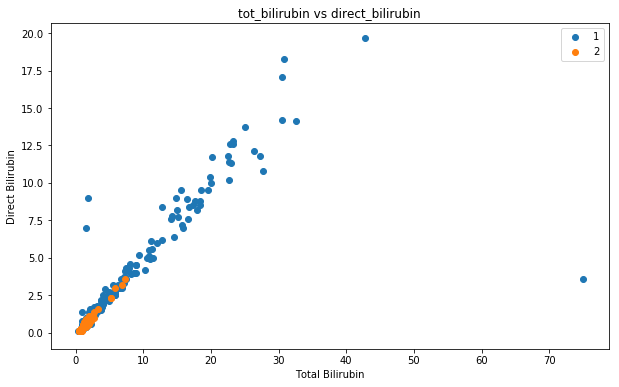

In [6]:
#Scatter plot for total bilirubin vs direct bilirubin for both classes
plt.clf()
plt.figure(figsize = (10, 6))
names = [1,2]
colors = ['b','r']
plt.title('tot_bilirubin vs direct_bilirubin')
plt.xlabel('Total Bilirubin')
plt.ylabel('Direct Bilirubin')
for i in range(len(names)):
    bucket = liverData[liverData['is_patient'] == i+1]
    bucket = bucket.iloc[:,[2,3]].values
    plt.scatter(bucket[:, 0], bucket[:, 1], label=names[i])
plt.legend()
plt.show()

In [7]:
#Checking for missing observations in the dataset
liverData.isnull().sum()

age                 0
gender              0
tot_bilirubin       0
direct_bilirubin    0
tot_proteins        0
albumin             0
ag_ratio            0
sgpt                0
sgot                0
alkphos             4
is_patient          0
dtype: int64

From the above information, we find that there are **4 missing values** in the column corresponding to "<b>alkphos</b>".
We will deal either by removing the rows with missing observations or by imputing the values with either mean, median or mode
or by any other value (estimated by another predictive model).

In our case, we will use the **mean to replace these observations**.

In [8]:
#Replacing the missing values in the alkphos variable with mean
liverData.fillna(liverData.mean(), inplace = True)
liverData['alkphos'].isnull().sum()

0

We have now replaced the missing values in the 'alkphos' column

In [9]:
#Summary of the Dataset
liverData.describe()

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.318492,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.947064,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


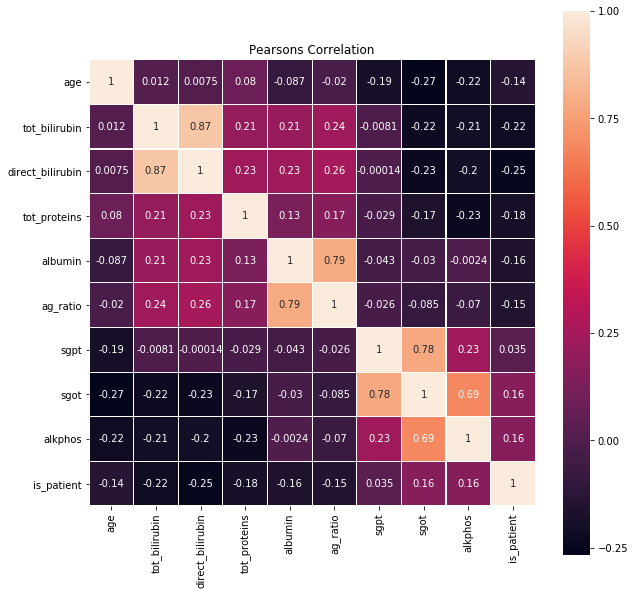

In [10]:
#Viewing the correlation matrix using seaborn library
plt.subplots(figsize=(10, 10))
plt.title('Pearsons Correlation')
# Draw the heatmap using seaborn
sea.heatmap(liverData.corr(),linewidths=0.25, vmax=1.0, square=True,annot=True)
plt.show()

In [11]:
#Seperating the dataset with all 10 variables and the is_patient entries
x = liverData.iloc[:,0:10]
y = liverData.iloc[:,10:]

In [12]:
'''Changing the factor levels of is_patient as is_patient(1) -> 0 and is_patient(2) -> 1'''
y.is_patient[y.is_patient == 1]=0
y.is_patient[y.is_patient == 2]=1

In [13]:
'''Changing the gender column into binary as female -> 0 and female -> 1
First changing the gender column to category and then using the category values we do label encoding'''

x['gender']=x['gender'].astype('category')
x['gender']= x['gender'].cat.codes

In [14]:
x.head(n=2)

,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74


The gender variable has now been encoded.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B1652E3AC8>,
      dtype=object)

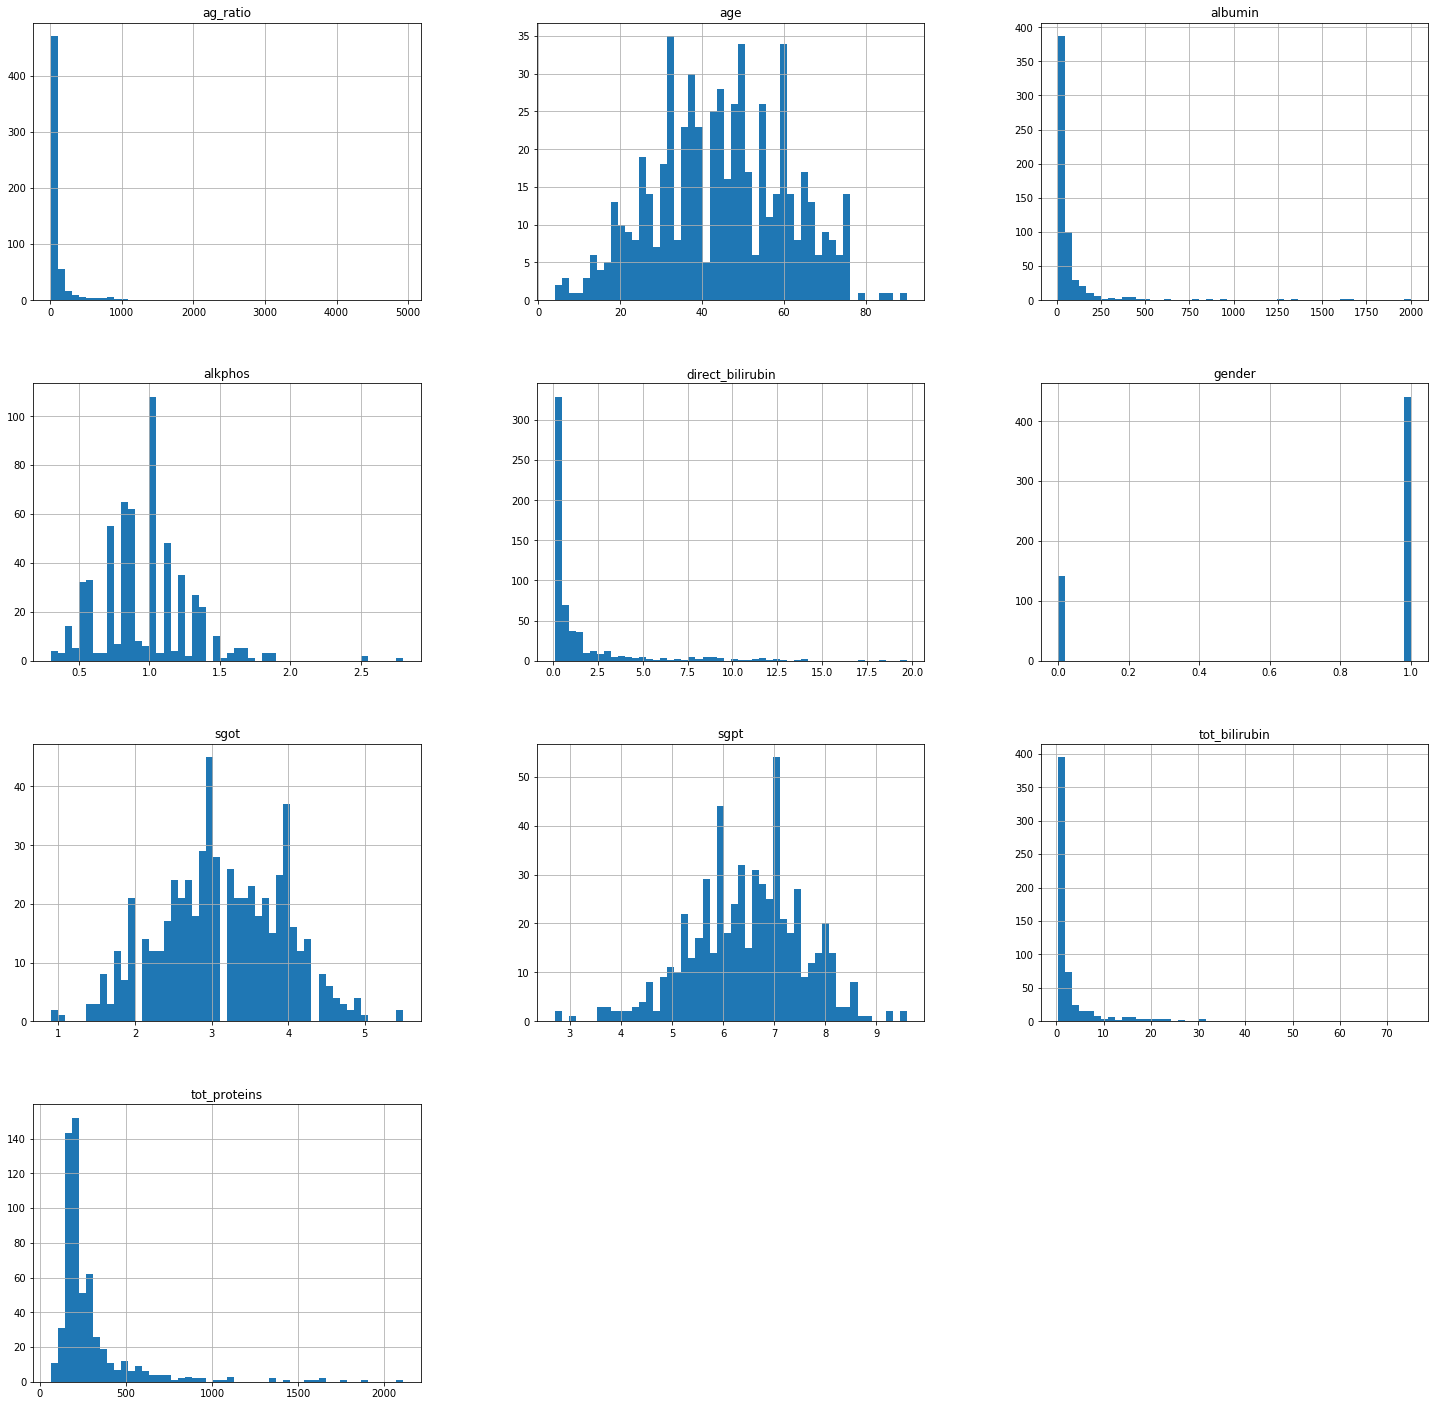

In [15]:
#viewing the histogram for the different variables in x to get an idea about how the values are distributed
x.hist(bins=50,figsize=(25, 25))

In [16]:
'''Spliting the prepared dataset into training and testing set
For this we will use the test_train_split which will be imported from sklearn.model_selection'''

#We split the training and testing set in 80:20 ratio
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=1)

In [17]:
x_train.shape

(466, 10)

In [18]:
y_train.shape

(466, 1)

In [19]:
'''The only thing that is left now to build the model is to scale the variables and for that we will use standard scaler
from sklearn.preprocessing'''

#importing standard scaler for scaling the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [20]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

### Logistic Regression

We will now train our model using Logistic Regression from sklearn.linear_model on our splitted dataset

In [21]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression()

In [22]:
'''Fitting the Logistic Regression Model'''

log_clf.fit(x_train,y_train.values.ravel())

#We use the .values to get the values of y_train in an array of shape(n,1) and then use .ravel() to convert the shape to(n,)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

The Logistic Regression Model is now ready to be used and predict whether a person is a liver patient or not.
We will now use our model on the testing set (x_test) and predict the outcome (y_test) and then compare it with the 
acutal values of y_test.

In [23]:
'''Predicting the outcome values of y_test using our log_clf() model'''

y_predicted = log_clf.predict(x_test)
y_predicted

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [24]:
#We now use confusion matrix imported from sklearn.metrics to find the accuracy of our model

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
conf_mat = confusion_matrix(y_test,y_predicted)
conf_mat

array([[75,  8],
       [22, 12]], dtype=int64)

In [25]:
accuracy_score(y_test,y_predicted)

0.7435897435897436

**Thus, we find that our classification model based on Logistic Regression algorithm has an accuracy score of 74.36%.**

### SVM

We will now build a second model based on support vector machine by importing SVC (Support Vector Classifier) from
sklearn.svm

In [26]:
from sklearn.svm import SVC
#SVC using linear kernel
svm_clf = SVC(kernel='linear')

In [27]:
'''Fitting the SVC'''
svm_clf.fit(x_train,y_train.values.ravel())

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

The SVC Model is now ready to be used and predict whether a person is a liver patient or not. We will now use our model on the testing set (x_test) and predict the outcome (y_test) and then compare it with the acutal values of y_test.

In [28]:
y_predicted_svc = svm_clf.predict(x_test)
y_predicted_svc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [29]:
conf_mat = confusion_matrix(y_test,y_predicted_svc)
conf_mat

array([[83,  0],
       [34,  0]], dtype=int64)

In [30]:
accuracy_score(y_test,y_predicted_svc)

0.7094017094017094

**Thus, we find that our classification model based on SVC(kernel = linear) has an accuracy score of 70.94%.**

In [31]:
#SVC using sigmoid Kernel
svm_sig_clf = SVC(kernel='sigmoid')
svm_sig_clf.fit(x_train,y_train.values.ravel())
y_predicted_sig = svm_sig_clf.predict(x_test)
y_predicted_sig

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [32]:
confusion_matrix(y_test,y_predicted_sig)

array([[80,  3],
       [28,  6]], dtype=int64)

In [34]:
accuracy_score(y_test,svm_sig_clf.predict(x_test))

0.7350427350427351

**We find that the accuracy score when with kernel = sigmoid has increased the accuracy of our model to 73.50%.**